In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Set dataset path and define classes
dataset_path = 'D:/Datset/Animal-10/raw-img'
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']



In [7]:
# Define a function to load and preprocess images
def load_images(class_name, dataset_path, image_size=(64, 64)):
    class_path = os.path.join(dataset_path, class_name)
    images = []
    labels = []

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img = img.convert('L')  # Convert to grayscale
            img = np.array(img).flatten()  # Flatten the image
            images.append(img)
            labels.append(1 if class_name == 'cane' else 0)  # Binary classification: cane vs. others
        except Exception as e:
            print(f"Failed to load image: {img_file}. Error: {e}")
    
    return np.array(images), np.array(labels)



In [9]:
# Load data for all classes and prepare binary labels for 'cane' vs. 'non-cane'
all_images = []
all_labels = []

for class_name in classes:
    print(f"Loading images for class: {class_name}")
    images, labels = load_images(class_name, dataset_path)
    all_images.append(images)
    all_labels.append(labels)

# Combine the data
X = np.vstack(all_images)
y = np.hstack(all_labels)



Loading images for class: cane
Loading images for class: cavallo
Loading images for class: elefante
Loading images for class: farfalla
Loading images for class: gallina
Loading images for class: gatto
Loading images for class: mucca
Loading images for class: pecora
Loading images for class: ragno
Loading images for class: scoiattolo


In [11]:
# Normalize the data
X = X / 255.0



In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=['non-cane', 'cane']))



Logistic Regression Accuracy: 0.7718
              precision    recall  f1-score   support

    non-cane       0.82      0.92      0.87      4250
        cane       0.26      0.12      0.16       986

    accuracy                           0.77      5236
   macro avg       0.54      0.52      0.51      5236
weighted avg       0.71      0.77      0.73      5236



C:\Users\KAIF\anaconda31\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


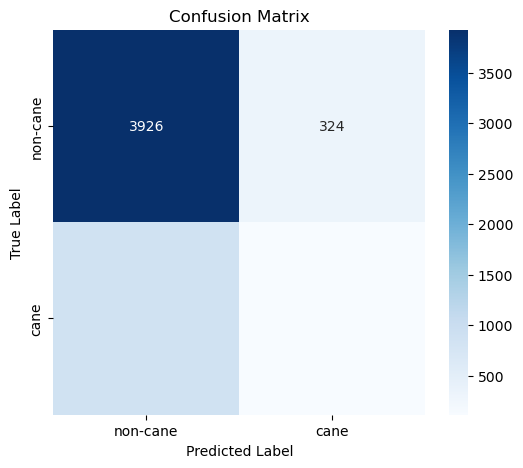

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['non-cane', 'cane'], yticklabels=['non-cane', 'cane'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



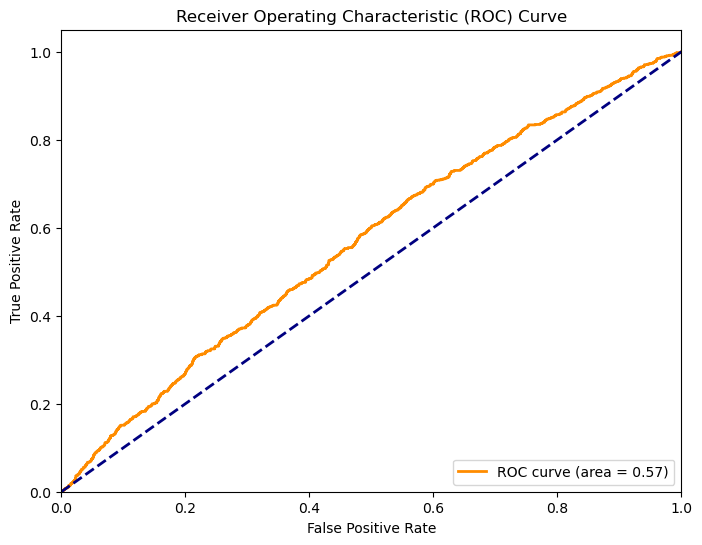

In [15]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


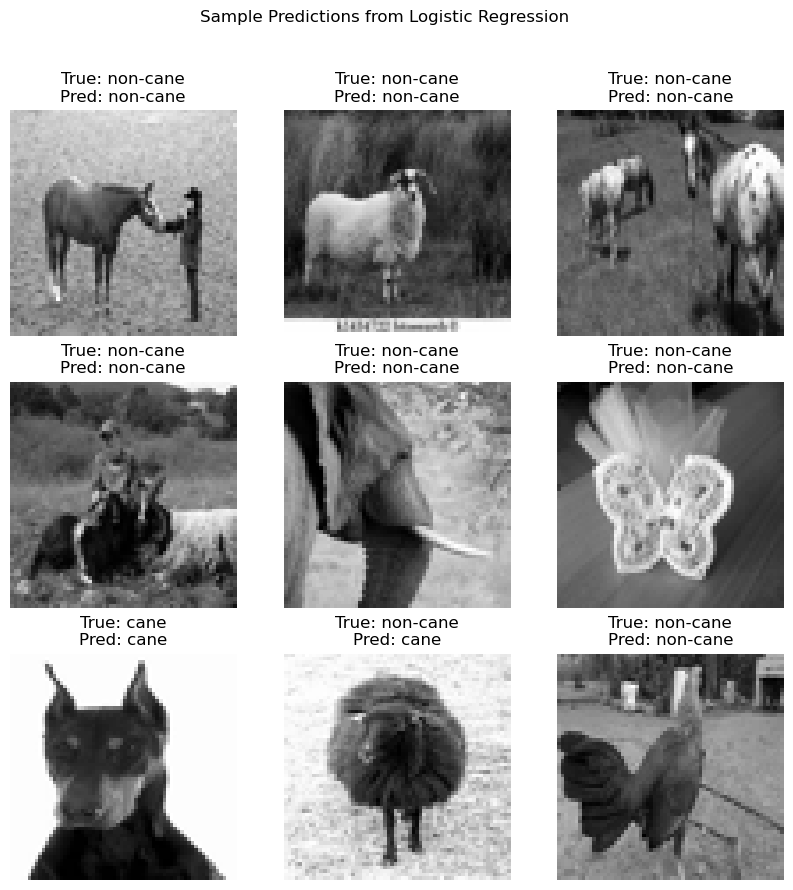

In [16]:

# Plot sample predictions for visual inspection
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Sample Predictions from Logistic Regression')
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, X_test.shape[0])
    image = X_test[random_index].reshape(64, 64)
    true_label = 'cane' if y_test[random_index] == 1 else 'non-cane'
    predicted_label = 'cane' if y_pred[random_index] == 1 else 'non-cane'
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")

plt.show()

In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import requests
from PIL import Image
from io import BytesIO


C:\Users\KAIF\anaconda31\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7998 - loss: 0.5750 - val_accuracy: 0.8117 - val_loss: 0.4632
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8175 - loss: 0.4531 - val_accuracy: 0.8178 - val_loss: 0.4048
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8252 - loss: 0.4076 - val_accuracy: 0.8153 - val_loss: 0.4271
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8349 - loss: 0.3838 - val_accuracy: 0.8466 - val_loss: 0.3654
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8594 - loss: 0.3468 - val_accuracy: 0.8581 - val_loss: 0.3524
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8639 - loss: 0.3274 - val_accuracy: 0.8655 - val_loss: 0.3246
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8749 - loss: 0.3061 - val_accuracy: 0.8577 - val_loss: 0.3537
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8899 - loss: 0.2731 - 

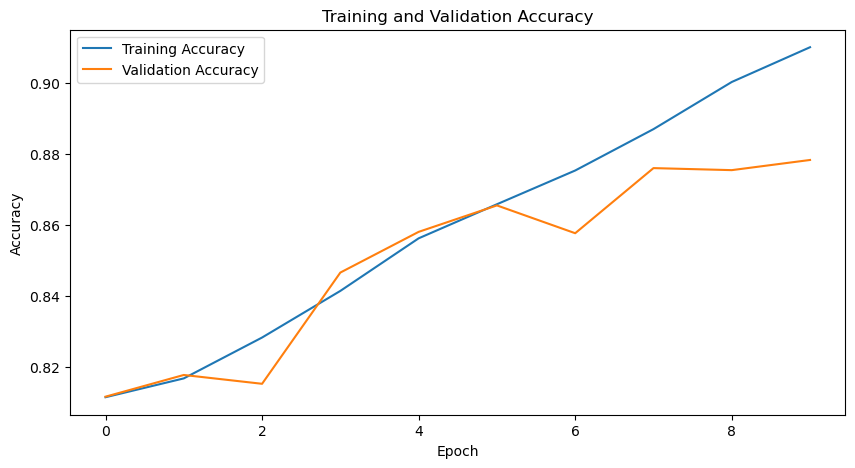

In [59]:

# Assuming you have X (images) and y (labels) prepared from the previous code
# Reshape X to include a channel dimension if needed (e.g., (n_samples, 64, 64, 1) for grayscale)
X = np.array(X).reshape(-1, 64, 64, 1)  # Adjust the shape as per your images
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=10)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output units for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to predict and plot new images from the web
def predict_web_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((64, 64))  # Resize to match the input shape
    img_array = np.array(img).reshape(1, 64, 64, 1)  # Reshape for model input
    img_array = img_array / 255.0  # Normalize the image
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("Image from Web")
    plt.axis('off')
    plt.show()
    
    # Predict the class
    prediction = model.predict(img_array)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    print(f"Predicted Class: {predicted_label[0]}")



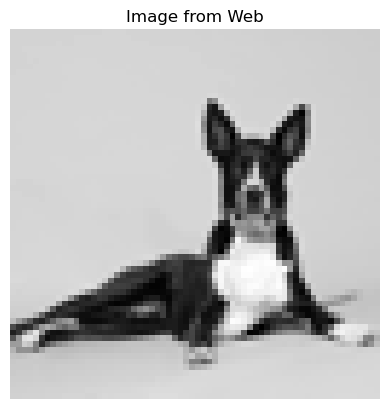

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Class: 1


In [61]:
# Test with an image URL from the web
url = 'https://i.natgeofe.com/n/5f35194b-af37-4f45-a14d-60925b280986/NationalGeographic_2731043_square.jpg'  # Replace with an actual URL of an image
predict_web_image(url)
